In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Main thing is Finite Difference Methods

In [19]:
def f(x):
    return x**(2/3)
    
def fwdDiff(f, x0, h):
    return (f(x0+h) - f(x0))/h

def backDiff(f,x0, h):
    return (-f(x0-h) + f(x0))/h

def threePtMidPt(f,x0,h):
    return (fwdDiff(f,x0,h)+backDiff(f,x0,h))/2

def threePtEndPt(f,x0,h):
    return (-3*f(x0) +4*f(x0+h) - f(x0+2*h))/(2*h)



In [21]:
print(fwdDiff(f, 0, 1))
print(fwdDiff(f, 0, 0.1))
print(fwdDiff(f, 0, 0.01))
print(fwdDiff(f, 0, 0.001))
print(fwdDiff(f, 0, 0.0001))
print(fwdDiff(f, 0, 0.000000000000000000000000000001))

1.0
2.154434690031884
4.641588833612779
10.000000000000002
21.544346900318846
10000000000.000025


In [4]:
def graph(f, a, b):
    i = 1
    # Prepare for visualization
    x = np.linspace(a - 1, b + 1, 400)
    y = f(x)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, y, label='f(x)', color='blue')
    ax.axhline(0, color='black', lw=1.5, ls='-')
    ax.axvline(0, color='black', lw=1.5, ls='-')
    ax.set_title('Graph of f(x)')

    # Plot the tangent line
    plt.show()

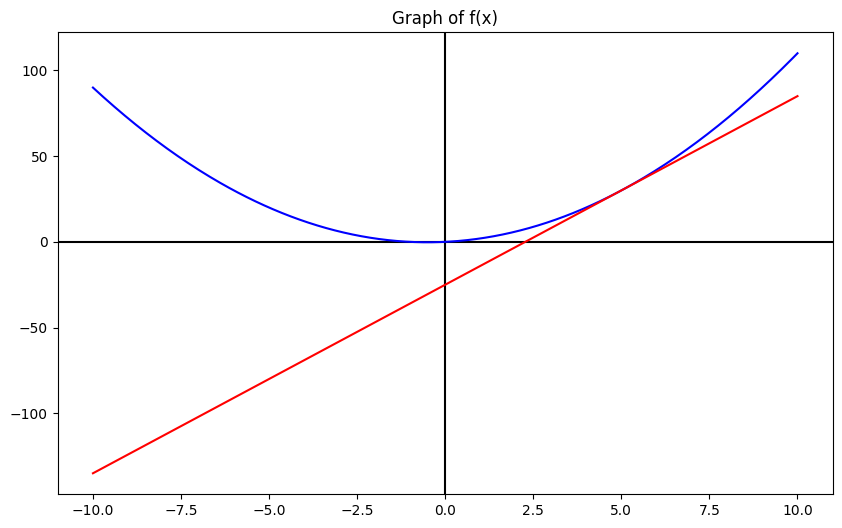

In [11]:
def f(x):
    return x**2+x

def graph_tangent(f, a, b, x_0):

    m = threePtMidPt(f, x_0, 0.01)
    b_tangent = f(x_0) - m*x_0


    # Prepare for visualization
    x = np.linspace(a , b , 400)
    y = f(x)
    y_tangent = m*x + b_tangent
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.axhline(0, color='black', lw=1.5, ls='-')
    ax.axvline(0, color='black', lw=1.5, ls='-')
    ax.plot(x, y, label='f(x)', color='blue')
    ax.plot(x, y_tangent, label='tangent', color='red')
    ax.set_title('Graph of f(x)')

    # Plot the tangent line
    plt.show()

graph_tangent(f, -10, 10, 5)

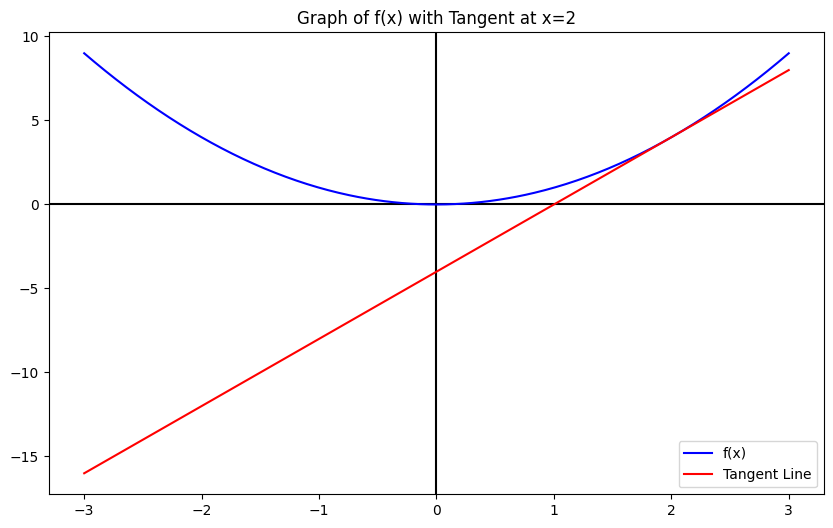

In [6]:
def threePtMidPt(f, x_0, h=0.01):
    # Approximate the derivative at x_0 using the three-point method
    return (f(x_0 + h) - f(x_0 - h)) / (2 * h)

def graph_tangent(f, a, b, x_0):
    # Calculate the slope of the tangent line at x_0
    m = threePtMidPt(f, x_0)
    
    # Calculate the y-intercept of the tangent line
    b_tangent = f(x_0) - m * x_0
    
    # Prepare for visualization
    x = np.linspace(a, b, 400)
    y = f(x)
    y_tangent = m * (x - x_0) + f(x_0)  # Tangent line equation
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.axhline(0, color='black', lw=1.5, ls='-')
    ax.axvline(0, color='black', lw=1.5, ls='-')
    ax.plot(x, y, label='f(x)', color='blue')
    ax.plot(x, y_tangent, label='Tangent Line', color='red')
    ax.set_title(f'Graph of f(x) with Tangent at x={x_0}')
    
    ax.legend()
    plt.show()

# Example function: f(x) = x^2
def f(x):
    return x**2

# Graph the tangent to f(x) = x^2 at x_0 = 2, between x = -3 and x = 3
graph_tangent(f, -3, 3, 2)

# Automatic Diffrentiation (AD)

Automatic Differentiation (AD) is a computational technique for calculating exact derivatives of functions represented in code. Unlike numerical differentiation, which approximates derivatives, AD computes derivatives to machine precision using the chain rule of calculus. It is widely used in fields such as machine learning, optimization, and scientific computing.

## How Automatic Differentiation Works
AD works by systematically applying the chain rule to every operation in a function. It breaks the computation into elementary operations and tracks their derivatives.

### Two Modes of AD
1. Forward Mode:

- Computes derivatives by propagating them alongside the computation of the function.
- Efficient when the number of inputs ($n$) is small compared to the number of outputs ($m$).
- Best for functions with one or few input variables.
- Example: Compute $f(x) = x^2+3x$. Track both $f(x)$ and $f'(x)$ in a single pass.


2. Reverse Mode:

- Computes derivatives by first calculating the function value, then backpropagating derivatives from the output.
- Efficient when the number of outputs ($m$) is small compared to the number of inputs ($n$)
- Best for functions with one or few output variables (e.g., scalar-valued loss functions in machine learning).
- Example: Compute the gradient of a neural network loss function with respect to all weights.

### Advantages of AD
1. High Precision:
AD computes derivatives to machine precision, avoiding truncation and round-off errors associated with numerical differentiation.
2. Efficiency:
AD tracks derivatives with minimal computational overhead compared to re-evaluating the function multiple times.
3. Automation:
AD requires no manual derivation of gradients, even for complex, composite functions.
4. Versatility:
AD works for functions of arbitrary complexity, including loops, conditionals, and user-defined functions

In [7]:
import numpy as np

class Tensor:
    def __init__(self, value, requires_grad=False):
        self.value = np.array(value, dtype=float)  # Value of the tensor
        self.requires_grad = requires_grad        # Whether to compute gradients
        self.grad = None                          # Gradient (initialized to None)
        self._grad_fn = None                      # Gradient function (backprop rule)
        self._grad_inputs = []                    # Inputs for the gradient computation

    def backward(self, grad_output=1.0):
        if not self.requires_grad:
            raise ValueError("This tensor does not require gradients.")
        
        if self.grad is None:
            self.grad = np.array(grad_output, dtype=float)
        else:
            self.grad += np.array(grad_output, dtype=float)
        
        if self._grad_fn:
            grads = self._grad_fn(self.grad)
            for t, g in zip(self._grad_inputs, grads):
                t.backward(g)

    def __add__(self, other):
        if not isinstance(other, Tensor):
            other = Tensor(other)

        result = Tensor(self.value + other.value, requires_grad=self.requires_grad or other.requires_grad)
        
        if result.requires_grad:
            def grad_fn(grad):
                return [grad, grad]  # Gradients for both inputs
            result._grad_fn = grad_fn
            result._grad_inputs = [self, other]
        
        return result
    
    def __sub__(self, other):
        if not isinstance(other, Tensor):
            other = Tensor(other)

        result = Tensor(self.value - other.value, requires_grad=self.requires_grad or other.requires_grad)
        
        if result.requires_grad:
            def grad_fn(grad):
                return [grad, grad]  # Gradients for both inputs
            result._grad_fn = grad_fn
            result._grad_inputs = [self, other]
        

    def __rmul__(self, other):
        return self.__mul__(other)

    def __mul__(self, other):
        if isinstance(other, Tensor):
            # Tensor * Tensor case
            result = Tensor(self.value * other.value, requires_grad=self.requires_grad or other.requires_grad)
            if result.requires_grad:
                def grad_fn(grad):
                    return [grad * other.value, grad * self.value]  # Chain rule
                result._grad_fn = grad_fn
                result._grad_inputs = [self, other]
        else:
            # Scalar * Tensor case (when other is not a Tensor)
            result = Tensor(self.value * other, requires_grad=self.requires_grad)
            if result.requires_grad:
                def grad_fn(grad):
                    return [grad * other]  # Gradient w.r.t. the scalar
                result._grad_fn = grad_fn
                result._grad_inputs = [self]

        return result

    def __pow__(self, power):
        if not isinstance(power, (int, float)):
            raise ValueError("Power must be an integer or float.")
        
        result = Tensor(self.value ** power, requires_grad=self.requires_grad)
        
        if result.requires_grad:
            def grad_fn(grad):
                return [grad * power * (self.value ** (power - 1))]
            result._grad_fn = grad_fn
            result._grad_inputs = [self]
        
        return result

    def sin(self):
        res = Variable(np.sin(self.val))
        res.dot = np.cos(self.val) * self.dot
        return res
    
    def exp(self):
        res = Variable(np.exp(self.val))
        res.dot = np.exp(self.val) * self.dot
        return res
# Example: Compute the derivative of y = x^2 + 3x + 2 at x = 2
x = Tensor(3.0, requires_grad=True)

y = 4*x*x   # y = x^2 + 3x + 2

# Perform backpropagation
y.backward()

# Gradient of y with respect to x
print(f"Value of y: {y.value}")
print(f"Derivative of y with respect to x: {x.grad}")


Value of y: 36.0
Derivative of y with respect to x: 24.0


In [8]:
def f(x1, x2):
    a = x1-x2
    b = np.exp(x2)
    return (np.sin(a) + a - b) * (a-b)

x1= Tensor(1.0, requires_grad=True)
x2= Tensor(2.0, requires_grad=True)
y= f(x1, x2)
y.backward()

NameError: name 'Variable' is not defined

bedmass? 
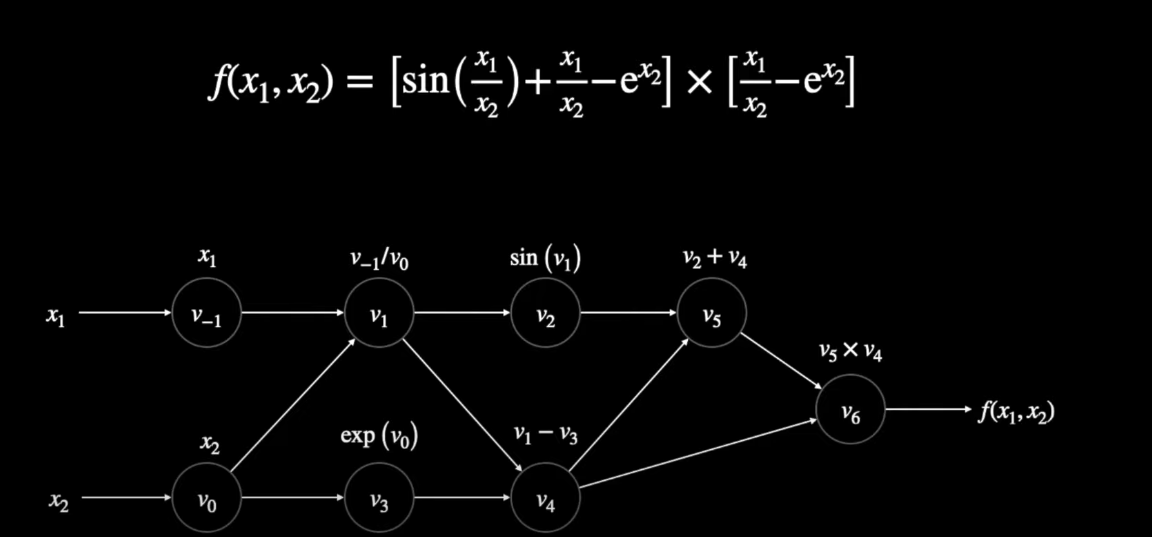

In [21]:
class Variable:
    def __init__(self, val, dot=0):
        self.val = val
        self.dot = dot

    def __add__(self, other):
        res = Variable(self.val + other.val)
        res.dot = self.dot + other.dot
        return res
    
    def __sub__(self, other):
        res = Variable(self.val - other.val)
        res.dot = self.dot - other.dot
        return res
    
    def __mul__(self, other):
        res = Variable(self.val * other.val)
        res.dot = self.dot * other.val + self.val* other.dot
        return res
    
    def __truediv__(self, other):
        res = Variable(self.val / other.val)
        res.dot = (self.dot * other.val - self.val * other.dot) / (other.val ** 2)
        return res

    def __pow__(self, other):
        res = Variable(self.val ** other.val)
        res.dot = other.val * (self.val ** (other.val - 1)) * self.dot
        return res
    
    def sin(self):
        res = Variable(np.sin(self.val))
        res.dot = np.cos(self.val) * self.dot
        return res
    
    def exp(self):
        res = Variable(np.exp(self.val))
        res.dot = np.exp(self.val) * self.dot
        return res
    
    def backward(self):
        self.dot = 1
        return self
    
    def __repr__(self):
        return str(self.val)
    
    def forward_df(x, dx = 1.0):
        a  = x * x
        da = dx *x + x * dx
        b = x* a
        db = dx * a + x * da
        c = a + b 
        dc = da + db

        return c, dc
    

x1 = Variable(3) 
x2 = Variable(4)
y = f(x1, x2)
y.backward()
print(x1.dot, x2.dot)





0 0


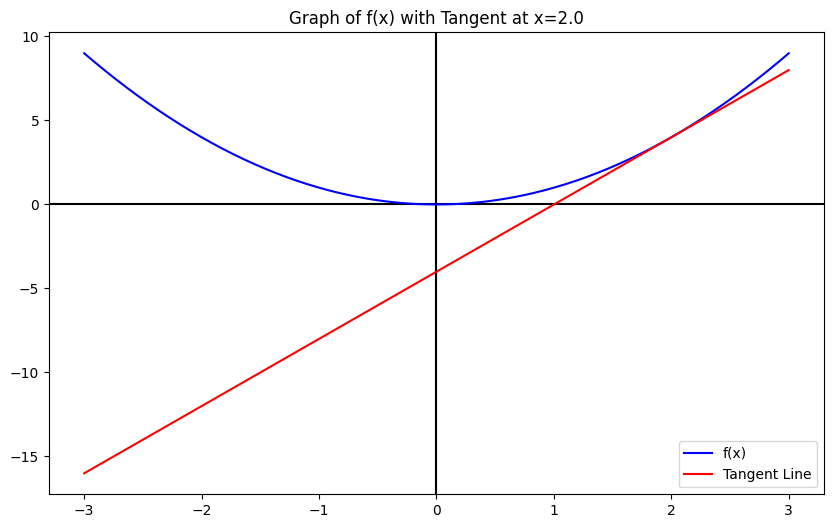

In [30]:
import numpy as np
import matplotlib.pyplot as plt

class Tensor:
    def __init__(self, value, requires_grad=False):
        self.value = np.array(value, dtype=float)
        self.requires_grad = requires_grad
        self.grad = None
        self._grad_fn = None
        self._grad_inputs = []

    def backward(self, grad_output=1.0):
        if not self.requires_grad:
            raise ValueError("This tensor does not require gradients.")
        if self.grad is None:
            self.grad = np.array(grad_output, dtype=float)
        else:
            self.grad += np.array(grad_output, dtype=float)
        if self._grad_fn:
            grads = self._grad_fn(self.grad)
            for t, g in zip(self._grad_inputs, grads):
                t.backward(g)

    def __add__(self, other):
        if not isinstance(other, Tensor):
            other = Tensor(other)
        result = Tensor(self.value + other.value, self.requires_grad or other.requires_grad)
        if result.requires_grad:
            def grad_fn(grad):
                return [grad, grad]
            result._grad_fn = grad_fn
            result._grad_inputs = [self, other]
        return result

    def __mul__(self, other):
        if not isinstance(other, Tensor):
            other = Tensor(other)
        result = Tensor(self.value * other.value, self.requires_grad or other.requires_grad)
        if result.requires_grad:
            def grad_fn(grad):
                return [grad * other.value, grad * self.value]
            result._grad_fn = grad_fn
            result._grad_inputs = [self, other]
        return result

    def __pow__(self, power):
        result = Tensor(self.value ** power, self.requires_grad)
        if result.requires_grad:
            def grad_fn(grad):
                return [grad * power * (self.value ** (power - 1))]
            result._grad_fn = grad_fn
            result._grad_inputs = [self]
        return result

    def __rmul__(self, other):
        return self.__mul__(other)

# Function to compute and graph the tangent line
def graph_tangent(f, a, b, x_0):
    # Initialize x_0 as a Tensor
    x_tensor = Tensor(x_0, requires_grad=True)
    
    # Compute f(x_0)
    y_tensor = f(x_tensor)
    
    # Perform backpropagation to compute the derivative
    y_tensor.backward()
    
    # Slope of the tangent (dy/dx at x_0)
    m = x_tensor.grad
    
    # Equation of the tangent line: y_tangent = m * (x - x_0) + f(x_0)
    x = np.linspace(a, b, 400)
    y = f(x)
    y_tangent = m * (x - x_0) + y_tensor.value
    
    # Plot the function and its tangent
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axhline(0, color='black', lw=1.5, ls='-')
    ax.axvline(0, color='black', lw=1.5, ls='-')
    ax.plot(x, y, label='f(x)', color='blue')
    ax.plot(x, y_tangent, label='Tangent Line', color='red')
    ax.set_title(f'Graph of f(x) with Tangent at x={x_0}')
    ax.legend()
    plt.show()

# Example function: f(x) = x^2
def f(x):
    if isinstance(x, Tensor):
        return x**2
    return x**2

# Graph the tangent to f(x) = x^2 at x_0 = 2, between x = -3 and x = 3
graph_tangent(f, -3, 3, 2.0)